<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-an-Experiment" data-toc-modified-id="Create-an-Experiment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create an Experiment</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#About-the-System" data-toc-modified-id="About-the-System-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>About the System</a></span></li></ul></li><li><span><a href="#Run-GROMACS-FDA" data-toc-modified-id="Run-GROMACS-FDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Run GROMACS FDA</a></span></li></ul></li><li><span><a href="#Parsing-PFA-File" data-toc-modified-id="Parsing-PFA-File-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parsing PFA File</a></span><ul class="toc-item"><li><span><a href="#Averaged-Parsing" data-toc-modified-id="Averaged-Parsing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Averaged Parsing</a></span></li></ul></li><li><span><a href="#Curvature" data-toc-modified-id="Curvature-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Curvature</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Description-of-the-Curvature-Plots" data-toc-modified-id="Description-of-the-Curvature-Plots-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Description of the Curvature Plots</a></span></li></ul></li></ul></li><li><span><a href="#Cluster" data-toc-modified-id="Cluster-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster</a></span></li><li><span><a href="#Force" data-toc-modified-id="Force-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Force</a></span></li><li><span><a href="#MSD-and-Diffusion" data-toc-modified-id="MSD-and-Diffusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>MSD and Diffusion</a></span></li><li><span><a href="#Framewise-parsing-of-PFA" data-toc-modified-id="Framewise-parsing-of-PFA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Framewise parsing of PFA</a></span></li><li><span><a href="#Lipid-Angles" data-toc-modified-id="Lipid-Angles-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Lipid Angles</a></span></li></ul></div>

In [1]:
from pyLFDA import LFDA
from IPython.display import SVG, display, Image

MDAnalysis  : INFO     MDAnalysis 2.0.0 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 2.0.0 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 2.0.0 STARTED logging to 'MDAnalysis.log'


# Create an Experiment
the `LFDA()` class is central in running analysis on your simulations. \
\
Arguments:
-   `experiment_name` : Name of the experiment. Uses this to create a directory to store outputs in. If not specified time-stamp of experiment will be used.
-   `pdb_filename` : Path of the PDB file to be used.
-   `gro_filename` : Path of the GRO file to be used.
-   `trr_filename` : Path of the TRR file to be used.
-   `tpr_filename` : Path of the TPR file to be used.
-   `ndx_filename` : Path of the NDX file to be used.
-   `gfda_version` : Version of Gromacs FDA to be used. Creates a directory with the name to store it and uses it for further experiments. Currently, we support these cersions only - ['v2020.4-fda2.10.2', 'v2020.3-fda2.10.1', 'v2020.3-fda2.10', 'v2020-fda2.10', 'v2019.3-fda2.9.1', 'v2018.7-fda2.9.1']. 

In [2]:
#To do analysis, first we create an LFDA() object.
#It stores all files required to do the experiment.
#The argument names are self explanatory.
experiment = LFDA(experiment_name="lfda_het_cg", trr_filename="het-cg/step7_production.trr", tpr_filename="het-cg/step7_production.tpr", ndx_filename="het-cg/index.ndx", pdb_filename="het-cg/step7_production.pdb", gro_filename="het-cg/step7_production.gro", gfda_version="v2020.4-fda2.10.2")
#The specified version will automatically be downloaded and be used for any subsequent experiments if the files are run from the same directory.

Making MDA Universe from PDB and TRR file
Parsing GRO file to calculate numbers of atoms, atoms information and box vectors
/mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/het-cg/step7_production.gro file parsed. with 14564 atoms in 0.07831740379333496 seconds


### About the System
 - This is a heterogenous course grained Martini System with the following molecules:
    - POPC: 360
    - POSM: 18
    - POPE: 144
    - POPI: 60
    - POPS: 18
    - W: 7184
    - NA: 78

## Run GROMACS FDA
`run_fda()` create `.pfi` file and then generating a PFA file using GROMACS FDA. \
 \
 Arguments : 
   -   `group1` : 1st group selected
   -   `group2` : 2nd group selected
   -   `residue_list` : [group1, group2]
   -   `pfi_filename` : Name of the PFI file to be generated. It is inferred from the experiment class if None.
   -   `pfa_filename` : Name of the PFA file to be generated. It is inferred from the experiment class if None.

In [3]:
#Run GROMACS FDA to calculate pairwise forces.
#This command creates a .pfa file containing pairwise forces between atoms.
experiment.run_fda(group1="POPS", group2="POPC", residue_list=["POPS", "POPC"], pfa_filename="pfa_file.pfa")

Creating PFI file
/mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_cg/pfi_Dec-17-2021_1935.pfi file created in 0.004339694976806641 seconds 
Running Gromacs FDA
ResidueRenumber: auto
Vector2Scalar: norm
Pairwise interactions selected: all
Pairwise forces for groups: POPS and POPC
Binary mode: 0
Threshold: 1e-10
Normalize punctual stress per residue: 0
Ignore missing potentials: 1


       :-) GROMACS - gmx mdrun, 2020.4-dev-20201029-4b5790511-unknown (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project

GMX RUN completed in 615.8366215229034 seconds
/mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_cg/pfa_file.pfa PFA file is generated in /mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_cg


Last frame      10000 time 1000000.000   

NOTE: 15 % of the run time was spent in pair search,
      you might want to increase nstlist (this has no effect on accuracy)

               Core t (s)   Wall t (s)        (%)
       Time:      615.627      615.642      100.0
                 (ns/day)    (hour/ns)
Performance:   140341.243        0.000

GROMACS reminds you: "What is a Unix or Linux sysadmin's favourite hangout place? Foo Bar." (Anonymous)



In [3]:
#Running GROMACS FDA can be a time consuming process.
#If you want to continue experimenting on a .pfa file you had previously generated.
#you can just load it and continue working.
#you dont need to run `run_fda()` if you load your .pfa file.
experiment.load_pfa(pfa_filename="lfda_het_cg/pfa_file.pfa", group1="POPS", group2="POPC", residue_list=["POPS", "POPC"])

Loading PFA file generated by Gromacs FDA


# Parsing PFA File
The `.pfa` file generated by GROMACS FDA is parsed for further analyses. The file can be parsed in two ways depending on your use case. 
 - `Average Parsing` - Allows for calculation of averaged properties over all frames. set `mode` argument to `average`.
 - `Framewise Parsing` - Allows for calculation of either properties for a specific frame or for a moving window over all frames. set `mode` argument to `framewise`.


## Averaged Parsing

In [5]:
#The .pfa file created, is parsed as average or framewise.
experiment.framewise=False #we specify that we need to parse pfa as average.
experiment.parse_pfa(file_name="generated_pfa_average.pfa")

Parsing PFA file as average
Parsed PFA file /mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_cg/generated_pfa_average.pfa created with 14564 atoms in 263.49041056632996 seconds
Summed PFA file parsed in 0.06467533111572266 seconds


In [4]:
#Parsing .pfa can also be time consuming.
#You can just load the parsed .pfa to continue experimenting.
#The generated pfa file should be parsed as average to further parse it as average and similarly for framewise.
#using this function in "average" mode automatically sets "experiment.framewise" to "False".
experiment.parse_parsed_pfa(file_name="lfda_het_cg/generated_pfa_average.pfa", mode="average", group1="POPS", group2="POPC", residue_list=["POPS","POPC"])

Loading Average parsed PFA file
Summed PFA file parsed in 0.029172658920288086 seconds


# Curvature 
This function generates curvature plots using MDAnalysis and displays them along with pairwise forces of the selected groups and the angle they make with the z-axis. \
\
Arguments: 
 - `specific_frame`: (int) Frame to calculate forces for. default: None.
 - `window`: (int) Moving Window size. default: None.
 - `num_x_bins`: (int) Number of bins in x-direction. default: 10.
 - `num_y_bins`: (int) Number of bins in y-direction. default: 10.
 - `split`: (bool) Split Calculations into Upper and Lower Membranes. default: False

In [5]:
#Generate curavture plots
experiment.curvature()

MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation


Creating curvature plot


MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


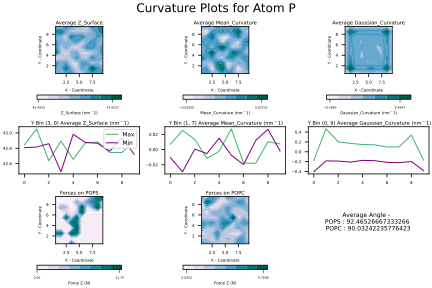

In [19]:
#visualise curvature plots
display(SVG("lfda_het_cg/curvature_averaged_10_10_P.svg"))

### Description of the Curvature Plots
 - The first row contains the 2d contours for the `average_z_surface`, `average_mean_curvature` and `average_gaussian_curvature` respectively.
 - The second row represents the values in the Y-Bin corresponding to the maximum(Green) and minimum(Purple) of the respective measure among the the Y-Bins.
 - The third row contains the 2d force contours for the selected lipids.

In [9]:
#Splitting the curavture into upper and lower membrane.
experiment.curvature(split=True)

[68.64947455 67.87826523 43.27094985] 1


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation


Creating curvature plot


MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


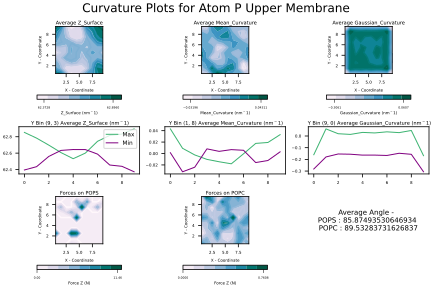

In [18]:
display(SVG("lfda_het_cg/curvature_averaged_10_10_P_Upper.svg"))

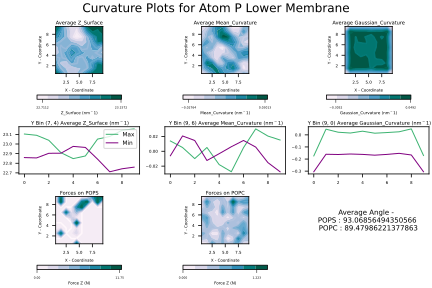

In [17]:
display(SVG("lfda_het_cg/curvature_averaged_10_10_P_Lower.svg"))

# Cluster 
This function clusters the selected residues. \
\
Arguments:
 - `attached_ligands`: (str) Ligand 1 to be clustered. default: group 1 previously selected("POPS" in this example).
 - `lipids_to_cluster`: (str) Ligand 2 to be clustered. default: group 2 previously selected("POPC" in this example).
 - `protein_residue_names`: (list) All residues except for attached_ligands and lipids_to_cluster.
 - `box_side_length`: (int) Length of a box size. default: 6.

In [12]:
experiment.cluster(lipids_to_cluster="POPS", attached_ligands="POPC")

Making clutering plots


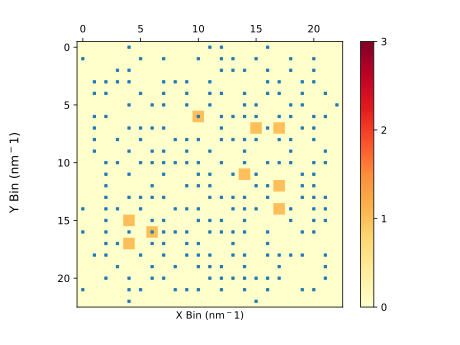

In [16]:
display(SVG("lfda_het_cg/cluster_POPS_POPC.svg"))

In [14]:
experiment.cluster(lipids_to_cluster="POPS", mode="single")

Making clutering plots


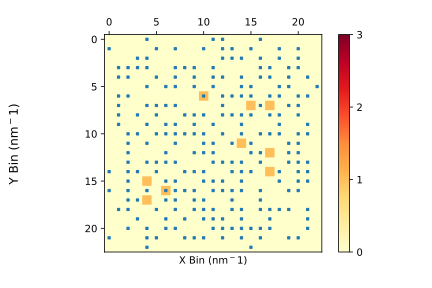

In [15]:
display(SVG("lfda_het_cg/cluster_POPS.svg"))

# Force 
This function calculates the pairwise force between selected groups 1 and 2. \
\
Arguments: 
 - `specific_frame`: (int) Frame to calculate forces for. default: None.
 - `window`: (int) Moving Window size. default: None.

In [16]:
experiment.force_graph()

Creating average force plot
Average Force plots created and saved


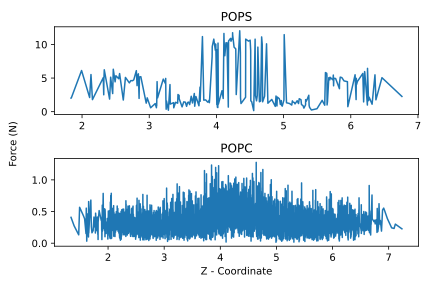

In [17]:
display(SVG("lfda_het_cg/force_averaged_['POPS', 'POPC'].svg"))

# MSD and Diffusion
This function calculates MSD values and calculates the diffusion coefficient using MDAnalyses.

In [18]:
experiment.msd()

MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation


Calculating diffusion coefficient


MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


Diffution coefficient and MSD plotted


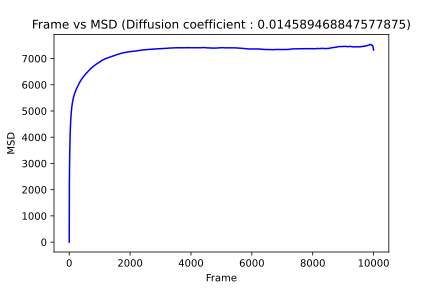

In [19]:
display(SVG("lfda_het_cg/MSD.svg"))

# Framewise parsing of PFA
This section illustrates how to generate framewise and moving window plots.

In [20]:
#The .pfa file created, is parsed asframewise.
experiment.framewise = True
experiment.parse_pfa(file_name="generated_pfa_framewise.pfa")

Parsing PFA file as framewise
Parsed PFA file /mnt/c/Users/bhava/Desktop/work/lfda/pyLFDA/het_memb/lfda_het_cg/generated_pfa_framewise.pfa created with 14564 atoms in 760.5916864871979 seconds
PFA file parsed in 654.4875428676605 seconds


In [4]:
#using this function in "framewise" mode automatically sets "experiment.framewise" to "True".
experiment.parse_parsed_pfa(file_name="lfda_het_cg/generated_pfa_framewise.pfa", mode="framewise", group1="POPS", group2="POPC", residue_list=["POPS","POPC"])

Loading Framewise parsed PFA file
Summed PFA file parsed in 965.686830997467 seconds


In [9]:
#create curvature plots for the 50th frame
experiment.curvature(specific_frame=50)

Creating 50 specific frame curvature plot


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
INFO:MDAnalysis.analysis.base:Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
INFO:MDAnalysis.analysis.base:Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up
INFO:MDAnalysis.analysis.base:Finishing up


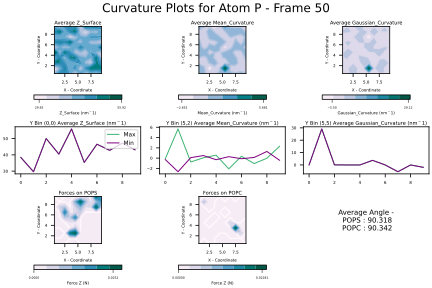

In [11]:
#visualise the plots
display(SVG("lfda_het_cg/curvature_framewise_10_10_P_50.svg"))

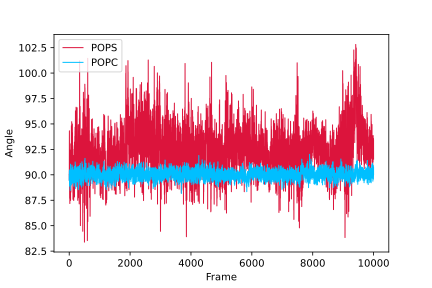

In [8]:
#Framewise lipid angles
display(SVG("lfda_het_cg/curvature_framewise_angles_framewise.svg"))

In [5]:
#create curvature plots for a moving window of size 20. Plots created are for the windows 0-1000, 1000-2000 and so on till 10k for our case.
experiment.curvature(window=1000)

Creating 1000 window size curvature plots


MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Choosing frames to analyze
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Finishing up
MDAnalysis.analysis.base: INFO     Finishing up


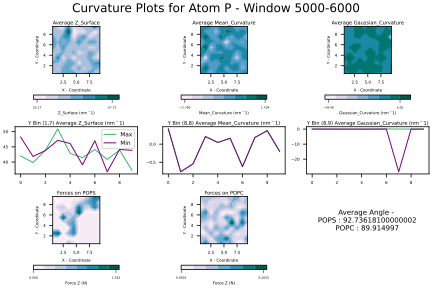

In [6]:
display(SVG("lfda_het_cg/curvature_moving_window_10_10_P_window_5000_6000.svg"))

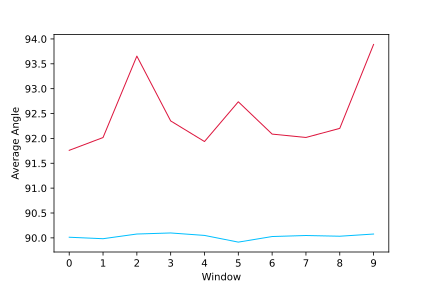

In [7]:
#Gangle isnt working
display(SVG("lfda_het_cg/curvature_moving_window_angles_windowed.svg"))

In [26]:
#create force plots for the 50th frame
experiment.force_graph(specific_frame=50)

Creating framewise average force plot
Force plots created and saved for frame - 50


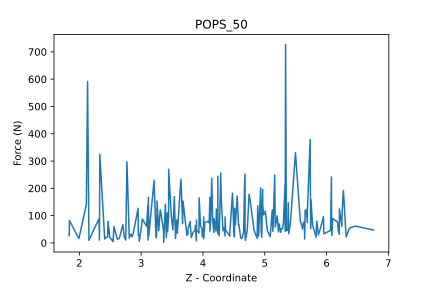

In [27]:
#visualise the plots
display(SVG("lfda_het_cg/force_specific_frame_POPS_50.svg"))

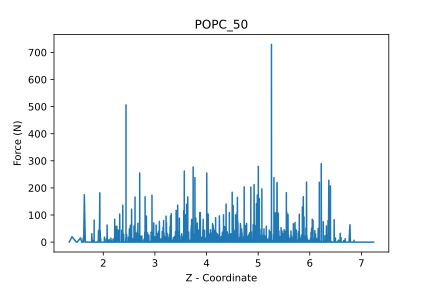

In [28]:
display(SVG("lfda_het_cg/force_specific_frame_POPC_50.svg"))

In [29]:
#create force plots for a moving window of size 20.
experiment.force_graph(window=20)

Creating framewise average force plot
Force plots created and saved for moving window of size - 20


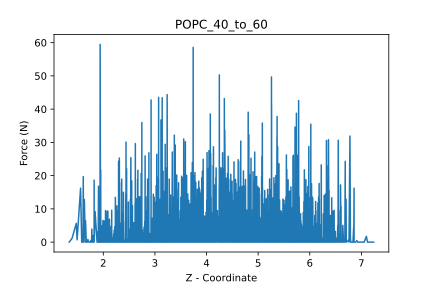

In [30]:
display(SVG("lfda_het_cg/force_moving_window_POPC_40_to_60.svg"))

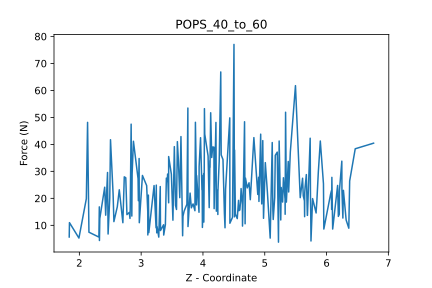

In [31]:
display(SVG("lfda_het_cg/force_moving_window_POPS_40_to_60.svg"))

In [32]:
#Create new PDB files with bFactor Loaded.
experiment.bfactor_pdb(bfactor_pdb_filename="bfactor_pdb_combined", mode="combined")

Loading a new PDB file with bFactor
PDB with BFactor values created in 1466.0400023460388 seconds


In [33]:
experiment.bfactor_pdb(bfactor_pdb_filename="bfactor_pdb_atomwise", mode="atomwise")

Loading a new PDB file with bFactor
PDB with BFactor values created in 2111.4183835983276 seconds


# Lipid Angles

This function calculates the angle between the vector of the selected lipids and the z-axis. The vector is defined between the P atom and the specified atom. The function allows you to calculate the angle individually for each lipid or group them together to calculate the average angle. \
\
Arguments: 
 - `selection`: (list) List of lipids for which the angle has to be calculated.
 - `grouping`: ('combine'/'individual') Whether to group the selected lipids or keep them individual.
 - `c_atom_name`: (str) Name of the atom to which the lipid vector is to be defined. default: 'C4B'.

In [4]:
experiment.angles(selection=['POPC', 'POPS', 'POPE', 'POSM'], grouping = 'individual', c_atom_name = 'C4B')

Calculating lipid angles with vector as P -> C4B


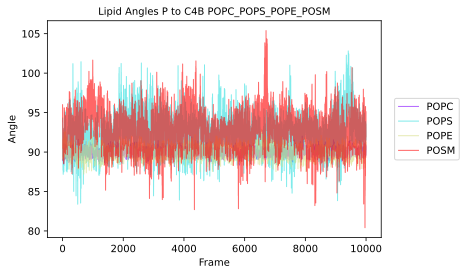

In [14]:
display(SVG("lfda_het_cg/angles_framewise_P_to_C4B_POPC_POPS_POPE_POSM.svg"))

In [6]:
experiment.angles(selection=['POPC', 'POPS', 'POPE', 'POSM'], grouping = 'individual', c_atom_name = 'C4B', split = True)

Calculating lipid angles with vector as P -> C4B


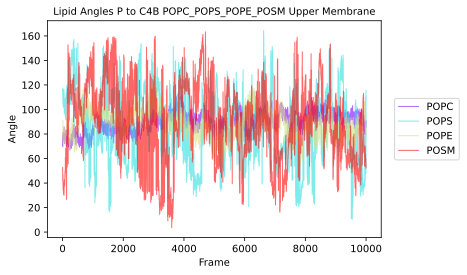

In [13]:
display(SVG("lfda_het_cg/angles_framewise_P_to_C4B_POPC_POPS_POPE_POSM_Upper.svg"))

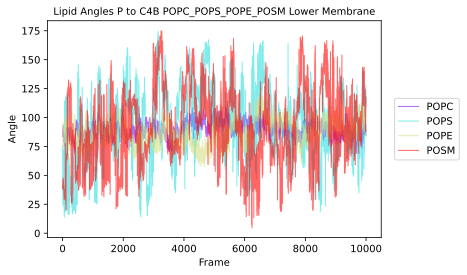

In [12]:
display(SVG("lfda_het_cg/angles_framewise_P_to_C4B_POPC_POPS_POPE_POSM_Lower.svg"))

In [9]:
experiment.angles(selection=['POPC', 'POPS', 'POPE', 'PSM'], grouping = 'combine', c_atom_name = 'C4B')

Calculating lipid angles with vector as P -> C4B


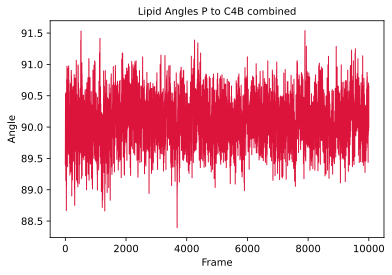

In [11]:
display(SVG("lfda_het_cg/angles_framewise_combined_P_to_C4B.svg"))